# **Assignment_18: Forecasting of Cocacola prices**

In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df_cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', index_col='Quarter')
df_cola.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


## **Exploratory Data Analysis and Visualizations**

In [3]:
df_cola.shape

(42, 1)

In [4]:
df_cola.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


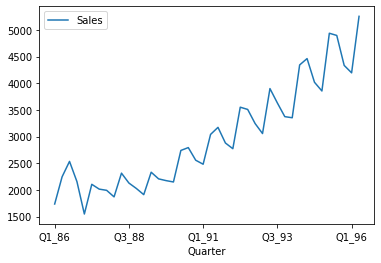

In [5]:
# Line plot to observe the trend of the price with time
df_cola.plot()

Observation: Positive trend. Looks mulitplicative seasonality since the price variations were broadened in each and every cycle.

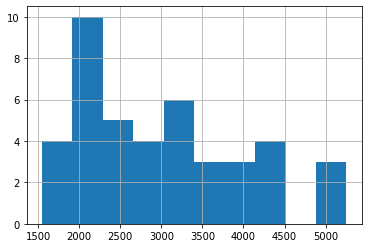

In [6]:
# Histogram and Density plots
df_cola['Sales'].hist()

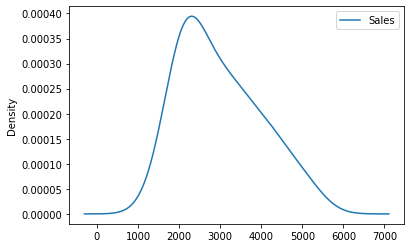

In [7]:
# Density plot
df_cola.plot(kind='kde')

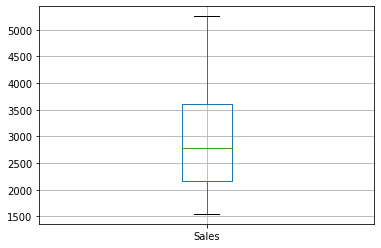

In [8]:
# Boxplot
df_cola.boxplot()

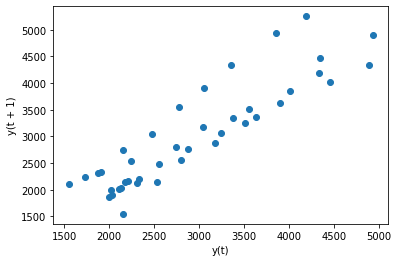

In [9]:
# lag plot
lag_plot(df_cola['Sales'])

## **Model Based Forecasting**

In [10]:
# Create a new column with serial number to use in forecasting
df_cola['t'] = range(1, 1+len(df_cola))
df_cola.head()

,Sales,t
Quarter,,
Q1_86,1734.827000,1
Q2_86,2244.960999,2
Q3_86,2533.804993,3
Q4_86,2154.962997,4
Q1_87,1547.818996,5


In [11]:
df_cola.tail()

,Sales,t
Quarter,,
Q2_95,4936.0,38
Q3_95,4895.0,39
Q4_95,4333.0,40
Q1_96,4194.0,41
Q2_96,5253.0,42


In [12]:
# Add t Squared column and log of Sales column
df_cola['log_Sales'] = np.log10(df_cola['Sales'])
df_cola['t_square'] = np.square(df_cola['t'])
df_cola.head()

,Sales,t,log_Sales,t_square
Quarter,,,,
Q1_86,1734.827000,1,3.239256,1
Q2_86,2244.960999,2,3.351209,4
Q3_86,2533.804993,3,3.403773,9
Q4_86,2154.962997,4,3.333440,16
Q1_87,1547.818996,5,3.189720,25


In [13]:
# Separate Quarter and Year into separate columns
df_cola['Quarter_Only'], df_cola['Year'] =  df_cola.index.str.split('_',1).str
df_cola.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,Sales,t,log_Sales,t_square,Quarter_Only,Year
Quarter,,,,,,
Q1_86,1734.827000,1,3.239256,1,Q1,86
Q2_86,2244.960999,2,3.351209,4,Q2,86
Q3_86,2533.804993,3,3.403773,9,Q3,86
Q4_86,2154.962997,4,3.333440,16,Q4,86
Q1_87,1547.818996,5,3.189720,25,Q1,87


In [14]:
df_temp = pd.get_dummies(df_cola['Quarter_Only'])
df_temp.head()

,Q1,Q2,Q3,Q4
Quarter,,,,
Q1_86,1,0,0,0
Q2_86,0,1,0,0
Q3_86,0,0,1,0
Q4_86,0,0,0,1
Q1_87,1,0,0,0


In [15]:
df_cola = pd.concat([df_cola, df_temp], axis=1)
df_cola.head()

,Sales,t,log_Sales,t_square,Quarter_Only,Year,Q1,Q2,Q3,Q4
Quarter,,,,,,,,,,
Q1_86,1734.827000,1,3.239256,1,Q1,86,1,0,0,0
Q2_86,2244.960999,2,3.351209,4,Q2,86,0,1,0,0
Q3_86,2533.804993,3,3.403773,9,Q3,86,0,0,1,0
Q4_86,2154.962997,4,3.333440,16,Q4,86,0,0,0,1
Q1_87,1547.818996,5,3.189720,25,Q1,87,1,0,0,0


In [16]:
# Split data into train and test data
df_cola_train = df_cola.head(32)
df_cola_test = df_cola.tail(10)

### **Linear Regression Model**

In [17]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales ~ t', data=df_cola_train).fit()

pred_linear = linear_model.predict(df_cola_test['t'])
pred_linear.head()

Quarter
Q1_94    3504.086233
Q2_94    3560.913734
Q3_94    3617.741235
Q4_94    3674.568736
Q1_95    3731.396237
dtype: float64

In [18]:
df_cola_test.head()

,Sales,t,log_Sales,t_square,Quarter_Only,Year,Q1,Q2,Q3,Q4
Quarter,,,,,,,,,,
Q1_94,3352.0,33,3.525304,1089,Q1,94,1,0,0,0
Q2_94,4342.0,34,3.637690,1156,Q2,94,0,1,0,0
Q3_94,4461.0,35,3.649432,1225,Q3,94,0,0,1,0
Q4_94,4017.0,36,3.603902,1296,Q4,94,0,0,0,1
Q1_95,3854.0,37,3.585912,1369,Q1,95,1,0,0,0


In [19]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error as mse
rmse_linear = mse(df_cola_test['Sales'], pred_linear, squared=False)
print('rmse_linear: ', rmse_linear)

rmse_linear:  752.9233932767116


### **Exponential Model**

In [20]:
exp_model = smf.ols('log_Sales ~ t', data = df_cola_train).fit()
pred_exp = exp_model.predict(df_cola_test['t'])
pred_exp.head()

Quarter
Q1_94    3.553683
Q2_94    3.563151
Q3_94    3.572618
Q4_94    3.582086
Q1_95    3.591554
dtype: float64

In [21]:
# Calculate RMSE
rmse_exp = mse(df_cola_test['log_Sales'], pred_exp, squared=False)
print('rmse_exp: ', rmse_exp)

rmse_exp:  0.058783545243553594


### **Quadratic Model**

In [22]:
quad_model = smf.ols('Sales ~ t + t_square ', data = df_cola_train).fit()
pred_quad = quad_model.predict(df_cola_test[['t', 't_square']])
pred_quad.head()

Quarter
Q1_94    3899.007943
Q2_94    4027.639391
Q3_94    4160.494601
Q4_94    4297.573572
Q1_95    4438.876305
dtype: float64

In [23]:
# Calculate RMSE
rmse_quad = mse(df_cola_test['Sales'], pred_quad, squared=False)
print('rmse_quad: ', rmse_quad)

rmse_quad:  457.735735540752


### **Additive Seasonality Model**

In [24]:
add_sea_model = smf.ols('Sales ~ Q1+Q2+Q3+Q4', data = df_cola_train).fit()
pred_add_sea = add_sea_model.predict(df_cola_test[['Q1', 'Q2', 'Q3', 'Q4']])
pred_add_sea.head()

Quarter
Q1_94    2189.943999
Q2_94    2777.750122
Q3_94    2748.113498
Q4_94    2549.922247
Q1_95    2189.943999
dtype: float64

In [25]:
# Calculate RMSE
rmse_add_sea = mse(df_cola_test['Sales'], pred_add_sea, squared=False)
print('rmse_add_sea: ', rmse_add_sea)

rmse_add_sea:  1850.466546185835


### **Additive Seasonality Quadratic Model**

In [26]:
add_sea_quad_model = smf.ols('Sales ~ t+t_square+Q1+Q2+Q3+Q4', data = df_cola_train).fit()
pred_add_sea_quad = add_sea_quad_model.predict(df_cola_test[['t', 't_square','Q1', 'Q2', 'Q3', 'Q4']])
pred_add_sea_quad.head()

Quarter
Q1_94    3599.111165
Q2_94    4264.178607
Q3_94    4311.803302
Q4_94    4190.873370
Q1_95    4141.181850
dtype: float64

In [27]:
# Calculate RMSE
rmse_add_sea_quad = mse(df_cola_test['Sales'], pred_add_sea_quad, squared=False)
print('rmse_add_sea_quad: ', rmse_add_sea_quad)

rmse_add_sea_quad:  277.351077112853


### **Multiplicative Seasonality Model**

In [28]:
mult_sea_model = smf.ols('log_Sales ~ Q1+Q2+Q3+Q4', data = df_cola_train).fit()
pred_mult_sea = mult_sea_model.predict(df_cola_test[['Q1', 'Q2', 'Q3', 'Q4']])
pred_mult_sea.head()

Quarter
Q1_94    3.329553
Q2_94    3.433479
Q3_94    3.428986
Q4_94    3.397828
Q1_95    3.329553
dtype: float64

In [29]:
# Calculate RMSE
rmse_mult_sea = mse(df_cola_test['log_Sales'], pred_mult_sea, squared=False)
print('rmse_mult_sea: ', rmse_mult_sea)

rmse_mult_sea:  0.24447293992567054


### **Multiplicative Additive Seasonality Model**

In [30]:
mult_add_sea_model = smf.ols('log_Sales ~ t + t_square+ Q1+Q2+Q3+Q4', data = df_cola_train).fit()
pred_mult_add_sea = mult_add_sea_model.predict(df_cola_test[['t', 't_square', 'Q1', 'Q2', 'Q3', 'Q4']])
pred_mult_add_sea.head()

Quarter
Q1_94    3.550148
Q2_94    3.664332
Q3_94    3.670098
Q4_94    3.649198
Q1_95    3.629564
dtype: float64

In [31]:
# Calculate RMSE
rmse_mult_add_sea = mse(df_cola_test['log_Sales'], pred_mult_add_sea, squared=False)
print('rmse_mult_add_sea: ', rmse_mult_add_sea)

rmse_mult_add_sea:  0.0671025352882842


### **Comparing above results**

In [32]:
data = {'Model':['RMSE_Lin', 'RMSE_Exp', 'RMSE_Quad', 'RMSE_Add_Sea', 'RMSE_Add_Sea_Quad', 'RMSE_mult_sea', 'RMSE_mult_add_sea'],
        'RMSE_Value' : [rmse_linear, rmse_exp, rmse_quad, rmse_add_sea, rmse_add_sea_quad, rmse_mult_sea, rmse_mult_add_sea]}

df_rmse = pd.DataFrame(data)
df_rmse

,Model,RMSE_Value
0,RMSE_Lin,752.923393
1,RMSE_Exp,0.058784
2,RMSE_Quad,457.735736
3,RMSE_Add_Sea,1850.466546
4,RMSE_Add_Sea_Quad,277.351077
5,RMSE_mult_sea,0.244473
6,RMSE_mult_add_sea,0.067103


Observation: RMSE value is least for Exponential Model. So, create this model with complete data

### **Final Model Creation for Forecasting of Cola Prices**

In [33]:
final_model = smf.ols('log_Sales ~ t', data = df_cola).fit()
pred_final = final_model.predict(df_cola['t'])
pred_final.head()

Quarter
Q1_86    3.238255
Q2_86    3.248797
Q3_86    3.259340
Q4_86    3.269883
Q1_87    3.280425
dtype: float64

In [34]:
# Calculate RMSE
rmse_final = mse(df_cola['log_Sales'], pred_final, squared=False)
print('rmse_final: ', rmse_final)

rmse_final:  0.05050605349092325


### **Observation: Final model got created with RMSE value of 0.05**

## **Persistence/Base and Arima Models**

### **Persistence/Base Model**

In [35]:
df_cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx', index_col = 'Quarter')
df_cola.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [36]:
df_cola['Sales-1'] = df_cola['Sales'].shift(1)
df_cola.head()

,Sales,Sales-1
Quarter,,
Q1_86,1734.827000,NaN
Q2_86,2244.960999,1734.827000
Q3_86,2533.804993,2244.960999
Q4_86,2154.962997,2533.804993
Q1_87,1547.818996,2154.962997


In [37]:
# Calculate RMSE
rmse_base = mse(df_cola.iloc[1:,0], df_cola.iloc[1:,1], squared=False)
rmse_base

438.64076429008264

### **Arima Model**

In [38]:
# Create Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings

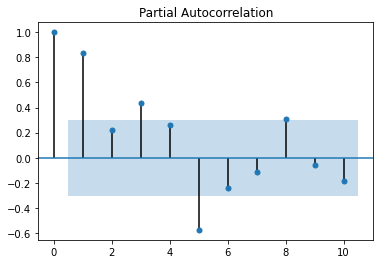

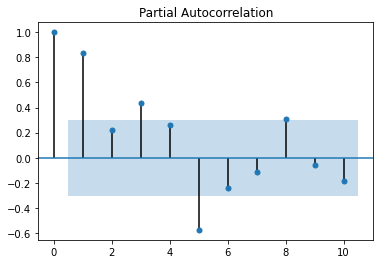

In [39]:
# Plot PACF to choose right p value for Arima order (Auto Regression)
plot_pacf(df_cola['Sales'], lags=10)

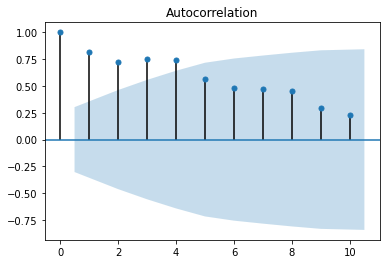

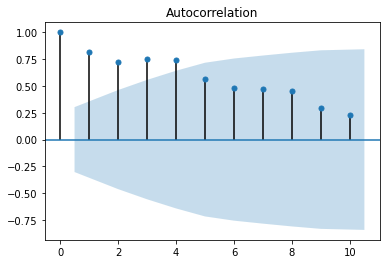

In [40]:
# Plot ACF to choose right q value for Arima order (Moving Average)
plot_acf(df_cola['Sales'], lags=10)

Observation: PACF Plot reduced exponentially at 2 from 0. So, p value of 2 will be considered.

ACF plot came with in range at 5. So, q value of 5 will be considered.

**Create Arima Order**

In [54]:
df_cola.shape

(42, 2)

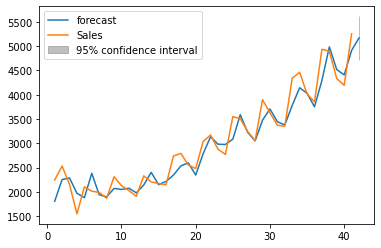

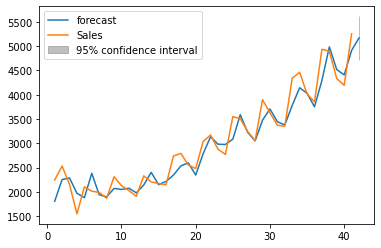

In [56]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_cola['Sales'], order=(2,0,4))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)[0]
pred_arima = model_fit.predict(start=1, end=42)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
model_fit.plot_predict(1,42)

In [57]:
pred_arima.shape

(42,)

In [58]:
# Calculate RMSE
rmse_arima = mse(df_cola['Sales'], pred_arima, squared=False)
print('rmse_arima: ', rmse_arima)

rmse_arima:  248.96364768699266


Final Conclusion: An ARIMA model with order (2,0,4) is created and predictions are near to actual values